<a href="https://colab.research.google.com/github/reeda23/OpenCV104-Histograms/blob/main/1_image_histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [16]:
#func to displayimages
def plt_showimage(title, image):

    if len(image.shape) == 3:

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [3]:
#func to plot histogram

def plt_hist(image, title, mask=None):

    #first split the channels
    chans = cv2.split(image)
    colors = ("b","g","r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of pixels")

    for (chan, color) in zip(chans, colors):
        #first argument is image
        #second argument is no of channels
        #third argument is mask
        #forth argument is range of bins
        hist = cv2.calcHist([chan], [0], mask, [256],[0,256])
        plt.plot(hist, color=color)
        plt.xlim([0,256])

    plt.show()

In [4]:
#read image
image = cv2.imread("/content/drive/MyDrive/OpenCV104 - Histograms/beach.png")

#converting the image into gray scale
image  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [5]:
#compute gray histogram

hist = cv2.calcHist([image], [0], None, [256], [0,256])


(0.0, 256.0)

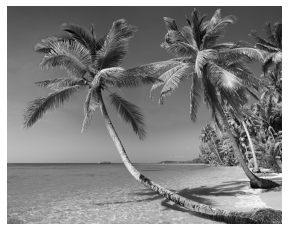

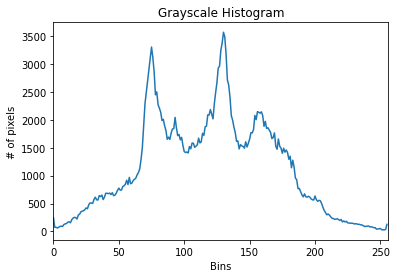

In [6]:
#displaying image with matplotlib
#matplotlib expect RGB image so 

plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(image,cv2.COLOR_GRAY2RGB))

#show histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(hist)
plt.xlim([0, 256])

(0.0, 256.0)

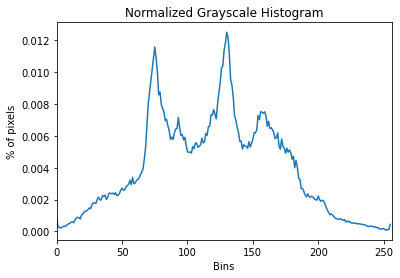

In [7]:
#normalized histogram

hist /= hist.sum()

#show histogram
plt.figure()
plt.title("Normalized Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("% of pixels")
plt.plot(hist)
plt.xlim([0, 256])

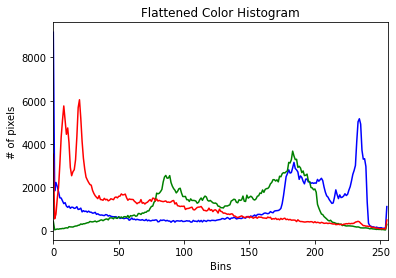

In [8]:
#color histogram
image = cv2.imread("/content/drive/MyDrive/OpenCV104 - Histograms/beach.png")
chans = cv2.split(image)
colors = ("b","g", "r")
plt.figure()
plt.title("Flattened Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")

#loop over the image channels
for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0],None, [256], [0,256])
    plt.plot(hist, color = color)
    plt.xlim([0,256])

2D histogram shape: (32, 32), with 1024 values


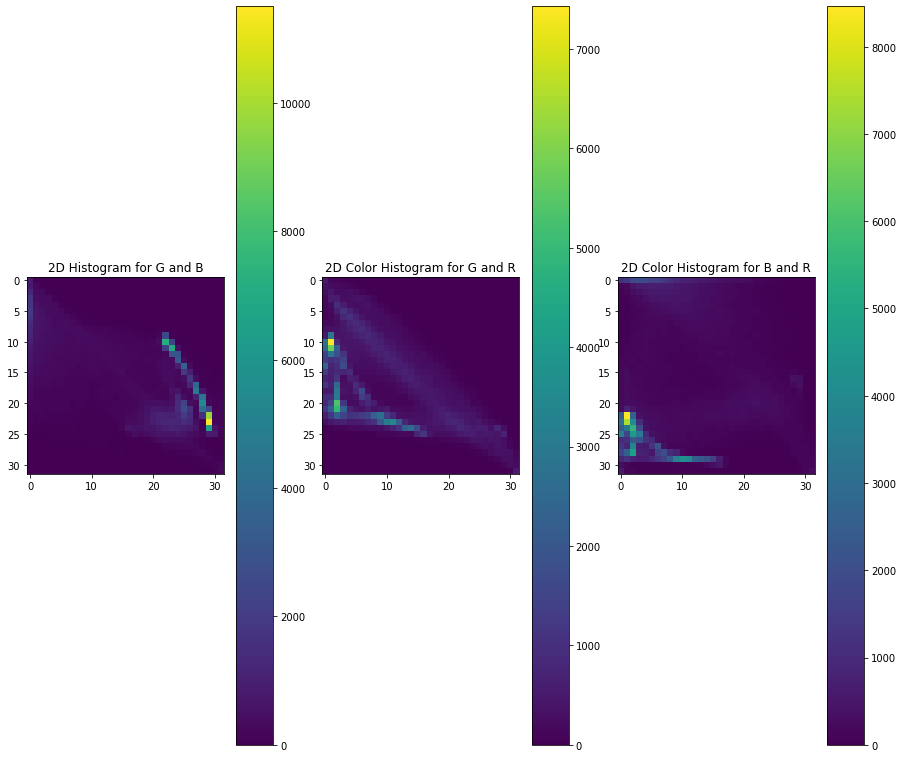

In [10]:
#2D histogram

fig = plt.figure(figsize=(15,25))
ax = fig.add_subplot(131) #131 Means 1x3 grid with 1 subplot
hist = cv2.calcHist([chans[1], chans[0]], [0,1], None, [32,32], [0,256 , 0,256])
p = ax.imshow(hist, interpolation= "nearest")
ax.set_title("2D Histogram for G and B")
plt.colorbar(p)

# plot a 2D color histogram for the green and red channels
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# plot a 2D color histogram for blue and red channels
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

In [11]:
#3D Histogram

hist = cv2.calcHist([image], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

3D histogram shape: (8, 8, 8), with 512 values


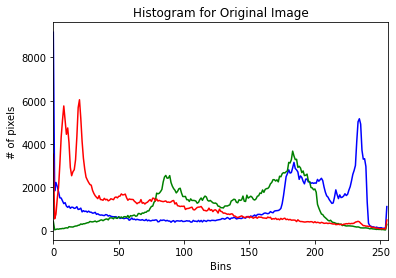

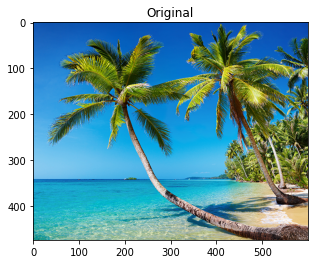

In [17]:
#masked region histogram
# load the beach image and plot a histogram for it
image = cv2.imread("/content/drive/MyDrive/OpenCV104 - Histograms/beach.png")
plt_hist(image, "Histogram for Original Image")
plt_showimage("Original", image)

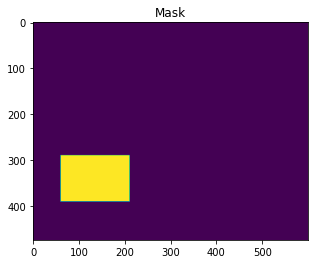

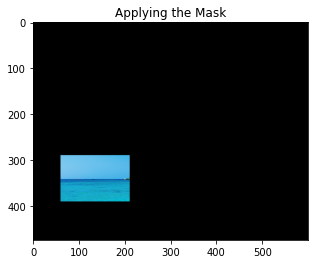

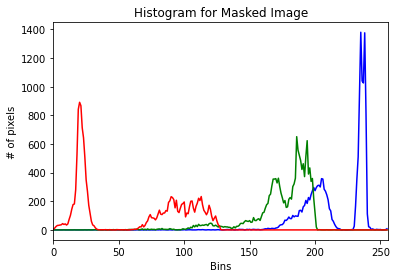

In [18]:
# construct a mask for our image; our mask will be *black* for regions
# we want to *ignore* and *white* for regions we want to *examine*
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (60, 290), (210, 390), 255, -1)
plt_showimage("Mask", mask)

# display the masked region
masked = cv2.bitwise_and(image, image, mask=mask)
plt_showimage("Applying the Mask", masked)

# compute a histogram for our image, but we'll only include pixels in
# the masked region
plt_hist(image, "Histogram for Masked Image", mask=mask)

# show our plots
plt.show()